In [1]:
import uproot
import awkward as ak #The events object is an awkward array
## Plotting.
import matplotlib.pyplot as plt

# Hists
import hist
from hist import Hist

# NanoEvents
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# Processors
#import coffea.processor as processor

#File to read
fname='WPLEPWMHADjj_4f_EWK_UL2018-NANOAODSIMv9.root'

#Define the events
events = NanoEventsFactory.from_root(
    fname,
    schemaclass=NanoAODSchema,
).events()

In [2]:
#List the branches of the root file 
ak.fields(events)

['TkMET',
 'fixedGridRhoFastjetCentralNeutral',
 'L1',
 'LHEReweightingWeight',
 'LHEPdfWeight',
 'DeepMETResolutionTune',
 'btagWeight',
 'SoftActivityJetHT2',
 'DeepMETResponseTune',
 'SoftActivityJetNjets5',
 'L1Reco',
 'luminosityBlock',
 'Muon',
 'LHE',
 'boostedTau',
 'GenIsolatedPhoton',
 'SoftActivityJetHT10',
 'FatJet',
 'PV',
 'event',
 'ChsMET',
 'PuppiMET',
 'TrigObj',
 'SoftActivityJetNjets10',
 'HLTriggerFirstPath',
 'PSWeight',
 'L1PreFiringWeight',
 'RawPuppiMET',
 'OtherPV',
 'Photon',
 'fixedGridRhoFastjetCentralChargedPileUp',
 'GenJet',
 'HTXS',
 'GenJetAK8',
 'fixedGridRhoFastjetAll',
 'GenMET',
 'GenVisTau',
 'SubGenJetAK8',
 'HLTriggerFinalPath',
 'RawMET',
 'Jet',
 'CorrT1METJet',
 'fixedGridRhoFastjetCentralCalo',
 'CaloMET',
 'SoftActivityJet',
 'SoftActivityJetHT5',
 'run',
 'Tau',
 'MET',
 'HLT',
 'LHEPart',
 'Pileup',
 'SV',
 'L1simulation',
 'FsrPhoton',
 'IsoTrack',
 'GenPart',
 'genTtbarId',
 'GenVtx',
 'LHEScaleWeight',
 'Generator',
 'Flag',
 'SubJet',

In [131]:
#List the metods of the branches
#ak.fields(events.Jet)
ak.fields(events.Muon)

['dxy',
 'dxyErr',
 'dxybs',
 'dz',
 'dzErr',
 'eta',
 'ip3d',
 'jetPtRelv2',
 'jetRelIso',
 'mass',
 'miniPFRelIso_all',
 'miniPFRelIso_chg',
 'pfRelIso03_all',
 'pfRelIso03_chg',
 'pfRelIso04_all',
 'phi',
 'pt',
 'ptErr',
 'segmentComp',
 'sip3d',
 'softMva',
 'tkRelIso',
 'tunepRelPt',
 'mvaLowPt',
 'mvaTTH',
 'charge',
 'jetIdx',
 'nStations',
 'nTrackerLayers',
 'pdgId',
 'tightCharge',
 'fsrPhotonIdx',
 'highPtId',
 'highPurity',
 'inTimeMuon',
 'isGlobal',
 'isPFcand',
 'isStandalone',
 'isTracker',
 'jetNDauCharged',
 'looseId',
 'mediumId',
 'mediumPromptId',
 'miniIsoId',
 'multiIsoId',
 'mvaId',
 'mvaLowPtId',
 'pfIsoId',
 'puppiIsoId',
 'softId',
 'softMvaId',
 'tightId',
 'tkIsoId',
 'triggerIdLoose',
 'genPartIdx',
 'genPartFlav',
 'cleanmask',
 'fsrPhotonIdxG',
 'genPartIdxG',
 'jetIdxG']

Text(0.5, 1.0, 'MET distribution')

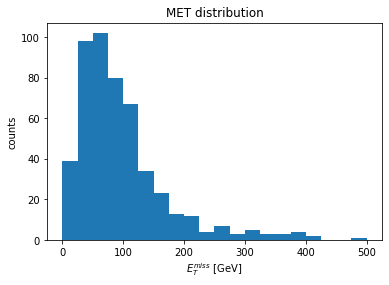

In [10]:
#Take the MET and plot its histogram
MET = events.MET.pt
plt.hist(MET, bins=20, range=[0,500], label="$E_{T}^{miss}$ [GeV]")
plt.xlabel("$E_{T}^{miss}$ [GeV]")
plt.ylabel("counts")
plt.title("MET distribution")
#plt.legend()

#Make histogram
#MET_hist=hist.Hist.new.Reg(20, 0, 500, name="MET", label="$E_{T}^{miss}$ [GeV]")
#Fill and plot histogram
#MET_hist.Double().fill(MET).plot1d()

Text(0.5, 1.0, 'muon $p_{T}$ distribution')

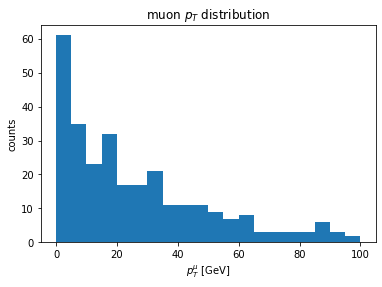

In [11]:
#Take the muon pt and plot its histogram
muonpt = events.Muon.pt
plt.hist(ak.flatten(muonpt), bins=20, range=[0,100], label="$p_{T}^{\mu}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays 
plt.xlabel("$p_{T}^{\mu}$ [GeV]")
plt.ylabel("counts")
plt.title("muon $p_{T}$ distribution")
#plt.legend()


Text(0.5, 1.0, 'electron $p_{T}$ distribution')

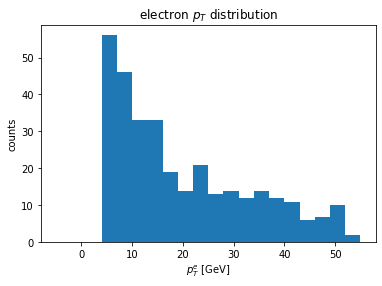

In [118]:
#Take the electron pt and plot its histogram
ept = events.Electron.pt
plt.hist(ak.flatten(ept), bins=20, range=[-5,55], label="$p_{T}^{e}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays
plt.xlabel("$p_{T}^{e}$ [GeV]")
plt.ylabel("counts")
plt.title("electron $p_{T}$ distribution")
#plt.legend()

Text(0.5, 1.0, 'jet $p_{T}$ distribution')

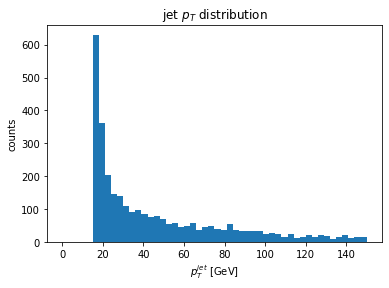

In [13]:
#Take the jet pt and plot its histogram
jpt = events.Jet.pt
plt.hist(ak.flatten(jpt), bins=50, range=[0,150], label="$p_{T}^{jet}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays
plt.xlabel("$p_{T}^{jet}$ [GeV]")
plt.ylabel("counts")
plt.title("jet $p_{T}$ distribution")
#plt.legend()

Text(0.5, 1.0, 'jet pseudorapidity distribution')

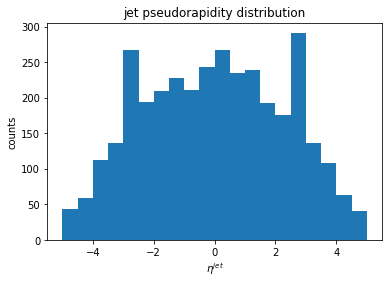

In [14]:
#Take the jet pseudorapidity and plot its histogram
jeta = events.Jet.eta
plt.hist(ak.flatten(jeta), bins=20, range=[-5,5], label="$\eta^{j}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays
plt.xlabel("$\eta^{jet}$")
plt.ylabel("counts")
plt.title("jet pseudorapidity distribution")
#plt.legend()

Text(0.5, 1.0, 'jet mass distribution')

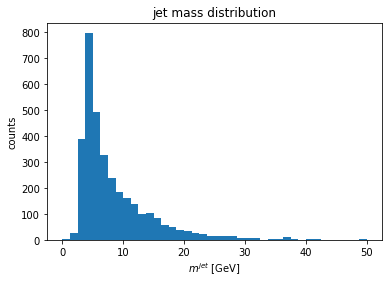

In [15]:
#Take the jet mass and plot its histogram
jm = events.Jet.mass
plt.hist(ak.flatten(jm), bins=40, range=[0,50], label="$m^{j}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays
plt.xlabel("$m^{jet}$ [GeV]")
plt.ylabel("counts")
plt.title("jet mass distribution")
#plt.legend()

Text(0.5, 1.0, 'genjet $p_{T}$ distribution')

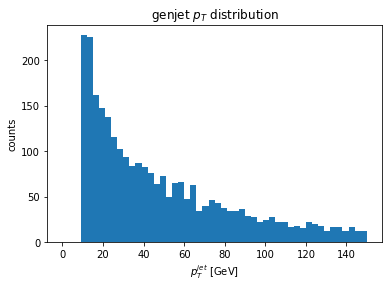

In [20]:
#Take the genjet pt and plot its histogram
gjpt = events.GenJet.pt
plt.hist(ak.flatten(gjpt), bins=50, range=[0,150], label="$p_{T}^{jet}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays
plt.xlabel("$p_{T}^{jet}$ [GeV]")
plt.ylabel("counts")
plt.title("genjet $p_{T}$ distribution")
#plt.legend()

Text(0.5, 1.0, 'genjet pseudorapidity distribution')

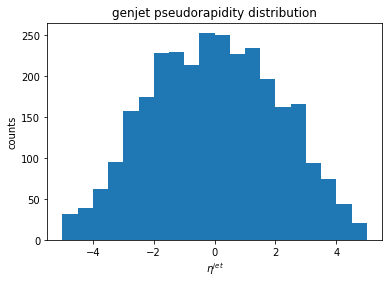

In [21]:
#Take the genjet pseudorapidity and plot its histogram
gjeta = events.GenJet.eta
plt.hist(ak.flatten(gjeta), bins=20, range=[-5,5], label="$\eta^{j}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays
plt.xlabel("$\eta^{jet}$")
plt.ylabel("counts")
plt.title("genjet pseudorapidity distribution")
#plt.legend()

Text(0.5, 1.0, 'genjet mass distribution')

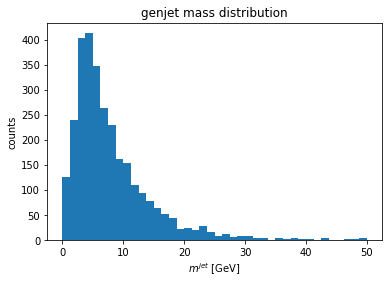

In [22]:
#Take the genjet mass and plot its histogram
gjm = events.GenJet.mass
plt.hist(ak.flatten(gjm), bins=40, range=[0,50], label="$m^{j}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays
plt.xlabel("$m^{jet}$ [GeV]")
plt.ylabel("counts")
plt.title("genjet mass distribution")
#plt.legend()

Text(0.5, 1.0, 'GenJetAK8 mass distribution')

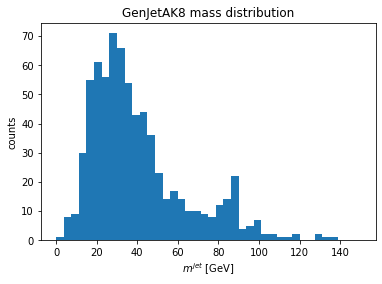

In [16]:
#Take the GenJetAK8 mass and plot its histogram
gjm = events.GenJetAK8.mass
plt.hist(ak.flatten(gjm), bins=40, range=[0,150], label="$m^{j}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays
plt.xlabel("$m^{jet}$ [GeV]")
plt.ylabel("counts")
plt.title("GenJetAK8 mass distribution")
#plt.legend()

Text(0.5, 1.0, 'fatjet mass distribution')

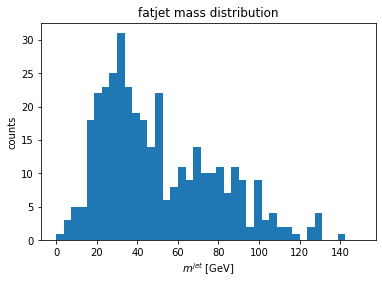

In [17]:
#Take the fatjet mass and plot its histogram
fjm = events.FatJet.mass
plt.hist(ak.flatten(fjm), bins=40, range=[0,150], label="$m^{j}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays
plt.xlabel("$m^{jet}$ [GeV]")
plt.ylabel("counts")
plt.title("fatjet mass distribution")
#plt.legend()

In [113]:
#Take all the jets 
jets = events.Jet

#Take the the jets with leading pT
jets_l = events.Jet[:,0]
#previous line: it means, for all the events, take the first jet
print(events.Jet.pt[:,1])
#plt.hist(jets_l.pt, bins=50, range=[0,150], label="$p_{T}^{jet}$ [GeV]")

#Take the jets with subleading pT
jets_sub = events.Jet[:,1]
#plt.hist(ak.flatten(jets_subleading.pt), bins=50, range=[0,150], label="$p_{T}^{jet}$ [GeV]")

[127, 43.6, 160, 107, 96, 147, 148, 104, ... 129, 122, 176, 40.5, 76.6, 90.2, 45.6]


Text(0.5, 1.0, 'VBS dijet pseudorapidity distribution')

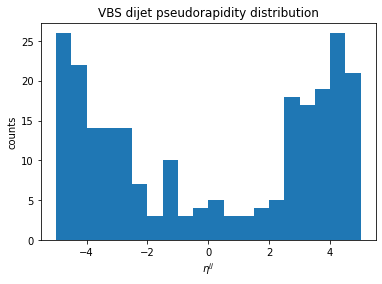

In [111]:
#Take all the jets 
jets = events.Jet
# Get all combinations of jet pairs in every event
dijets = ak.combinations(jets, 2, fields=['i0', 'i1'])
#print(dijets)
#dijets.type

# Check that jet pairs have the greatest mass
ismax=(dijets['i0']+dijets['i1']).mass==ak.max((dijets['i0']+dijets['i1']).mass, axis=1)
#previous line: returns a Boolean array with True where the condition is met, and false otherwise

# Mask the dijets with the ismax to get dijets with the gratest mass
good_dijets = dijets[ismax]

# Separate pairs into arrays of the first and the second jet in each pair.
first_jet, second_jet = ak.unzip(good_dijets)

# Compute difference in pseudorapidity
delta_eta = first_jet.eta - second_jet.eta

# Plot
plt.hist(ak.flatten(delta_eta), bins=20, range=[-5,5], label="$\delta\eta^{jj}$")
plt.xlabel("$\eta^{jj}$")
plt.ylabel("counts")
plt.title("VBS dijet pseudorapidity distribution")
#plt.hist(ak.flatten((first_jet+second_jet).mass), bins=40, range=[0,5000], label="$m^{jj}$ [GeV]")
#plt.xlabel("$m^{jj}$ [GeV]")
#plt.ylabel("counts")
#plt.title("VBS dijet mass distribution")
#plt.legend()

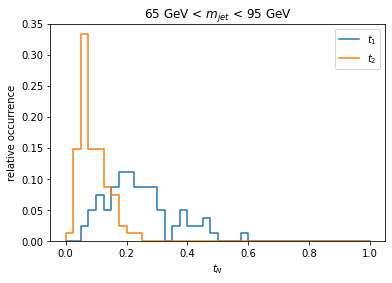

In [115]:
#Take the fatjets
fatjets = events.FatJet
# Get only fatjets with mass between 65 and 95
limits = ((fatjets.mass>65) & (fatjets.mass<95))
#Get the variables of N-subjectiness
good_fatjets=fatjets[limits]
tau_1=good_fatjets.tau1
tau_2=good_fatjets.tau2
#Normalization factors
norm_1 = ak.sum(ak.num(tau_1))
norm_2 = ak.sum(ak.num(tau_2))

#Plot two histograms together
h = hist.Hist(hist.axis.StrCategory(name='channel', label='Channel', categories=['$t_{1}$', '$t_{2}$']), 
                      hist.axis.Regular(name='t', label='tau', bins=40, start= 0, stop=1))

h.fill(channel='$t_{1}$', t=ak.flatten(tau_1), weight=1/norm_1)
h.fill(channel='$t_{2}$', t=ak.flatten(tau_2), weight=1/norm_2)
h.plot()
plt.title("65 GeV < $m_{jet}$ < 95 GeV")
plt.xlabel("$t_{N}$")
plt.ylabel("relative occurrence")
plt.legend()

Text(0, 0.5, 'relative occurrence')

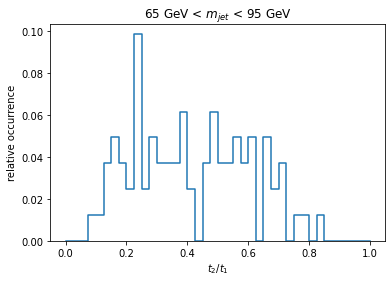

In [100]:
#Take the tau2 to tau1 ratio
tau_r=tau_2/tau_1
#Normalization factor
norm_r = ak.sum(ak.num(tau_r))
#Plot the histogram
h_r = Hist(hist.axis.Regular(40, 0, 1, name="$t_{r}$", label="$t_{r}$"))
h_r.fill(ak.flatten(tau_r), weight=1/norm_r)
h_r.plot()
plt.title("65 GeV < $m_{jet}$ < 95 GeV")
plt.xlabel("$t_{2}/t_{1}$")
plt.ylabel("relative occurrence")

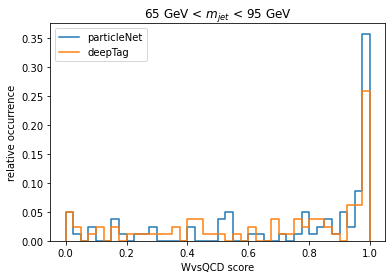

In [110]:
#Take the fatjets
fatjets = events.FatJet
# Get only fatjets with mass between 65 and 95
limits = ((fatjets.mass>65) & (fatjets.mass<95))
#Get the variables of particleNet and deepTag
good_fatjets=fatjets[limits]
pNet=good_fatjets.particleNet_WvsQCD
dTag=good_fatjets.deepTag_WvsQCD
#Normalization factor
norm_pNet = ak.sum(ak.num(pNet))
norm_dTag = ak.sum(ak.num(dTag))

#Plot two histograms together
h = hist.Hist(hist.axis.StrCategory(name='channel', label='Channel', categories=['particleNet', 'deepTag']), 
                      hist.axis.Regular(name='WvsQCD', label='WvsQCD', bins=40, start= 0, stop=1))

h.fill(channel='particleNet', WvsQCD=ak.flatten(pNet), weight=1/norm_pNet)
h.fill(channel='deepTag', WvsQCD=ak.flatten(dTag), weight=1/norm_dTag)
h.plot()
plt.title("65 GeV < $m_{jet}$ < 95 GeV")
plt.xlabel("WvsQCD score")
plt.ylabel("relative occurrence")
plt.legend()